In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import tensorflow as tf
%matplotlib inline
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('45 channel 1sec thetapower with labels.csv')


print('Number of rows and columns:', df.shape)
df.head(5)


Number of rows and columns: (8391, 46)


,1.7168,0.7701,2.0279,1.5401,0.99819,1.1731,2.6485,3.8149,1.2338,0.88954,...,0.011615,5.3083,3.0997,0.077031,3.4761,1.158,0.13569,1.684,1.0739,1
0,3.63550,2.01610,8.2409,0.97542,0.34228,0.49257,5.00000,7.2476,0.72259,0.27872,...,0.020156,1.08040,4.9067,0.038913,2.01940,0.20654,0.017996,0.99616,3.8334,1
1,4.29050,2.17670,5.2263,1.17550,0.82307,2.39160,3.42360,4.6104,1.09800,1.22110,...,0.009700,4.50850,2.8731,0.082510,4.60750,0.99036,0.043765,2.43060,1.6004,1
2,4.47920,2.18260,1.6886,0.86329,0.84286,1.43750,0.84828,2.6751,0.84077,1.24710,...,0.027113,1.98990,3.7446,0.120370,3.04090,0.65082,0.051503,0.57891,3.4661,1
3,1.04920,2.73260,4.8865,1.23700,1.22240,1.40350,0.68488,2.2991,1.02040,1.33070,...,0.016249,0.73852,2.4045,0.078866,0.80777,0.39631,0.079627,0.24800,3.5963,1
4,0.38494,0.33114,1.4818,1.20570,0.91273,0.73948,2.32580,3.3002,1.02670,0.76764,...,0.060322,2.96940,3.8396,0.117810,2.52370,0.74328,0.046361,0.45013,1.0101,1




**Labelling COLUMNS**

In [2]:
print(df.columns)

Index(['1.7168', '0.7701', '2.0279', '1.5401', '0.99819', '1.1731', '2.6485',
       '3.8149', '1.2338', '0.88954', '1.2727', '3.5376', '1.21', '1.1535',
       '5.6778', '1.0589', '0.023978', '2.9581', '1.5352', '1.7772', '0.64967',
       '0.0437', '1.1827', '2.0981', '0.89607', '1.1884', '3.5801', '11.501',
       '1.5535', '1.0139', '1.1312', '3.6471', '1.0109', '1.041', '3.7721',
       '9.8425', '0.011615', '5.3083', '3.0997', '0.077031', '3.4761', '1.158',
       '0.13569', '1.684', '1.0739', '1'],
      dtype='object')


In [3]:
new_names = {'1.7168':'a', 
             '0.7701':'b', 
             
             '2.0279':'c', 
             '1.5401':'cd', 
             '0.99819':'d',
             '1.1731':'de',
             '2.6485':'e',
             '3.8149':'f',
             '1.2338':'g',
       '0.88954':'l', 
             '1.2727':'m', 
             '3.5376':'n', 
             '1.21':'o', 
             '1.1535':'p', 
             '5.6778':'q', 
             '1.0589':'r',
       '0.023978':'s',
             '2.9581':'t',
             '1.5352':'u',
             '1.7772':'v',
             '0.64967':'w',
             '0.0437':'x', 
             '1.1827':'y',
       '2.0981':'z', 
             '0.89607':'aa', 
             '1.1884':'hh', 
             '3.5801':'ii', 
             '11.501':'jj', 
             '1.5535':'kk',
       '1.0139':'ll',
             '1.1312':'mm',
             '3.6471':'nn', 
             '1.0109':'oo', 
             '1.041':'pp', 
             '3.7721':'qq',
       '9.8425':'rr',
             '0.011615':'j',
             '5.3083':'bb', '3.0997':'cc',
             '0.077031':'dd',
             '3.4761':'ee',
             '1.158':'ff',
             '0.13569':'gg',
             '1.684':'ll',
             '1.0739':'ss',
             '1':'labels'}
df= df.rename(index=str, columns=new_names)

***Checking any null Values***

In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8391 entries, 0 to 8390
Data columns (total 46 columns):
a         8391 non-null float64
b         8391 non-null float64
c         8391 non-null float64
cd        8391 non-null float64
d         8391 non-null float64
de        8391 non-null float64
e         8391 non-null float64
f         8391 non-null float64
g         8391 non-null float64
l         8391 non-null float64
m         8391 non-null float64
n         8391 non-null float64
o         8391 non-null float64
p         8391 non-null float64
q         8391 non-null float64
r         8391 non-null float64
s         8391 non-null float64
t         8391 non-null float64
u         8391 non-null float64
v         8391 non-null float64
w         8391 non-null float64
x         8391 non-null float64
y         8391 non-null float64
z         8391 non-null float64
aa        8391 non-null float64
hh        8391 non-null float64
ii        8391 non-null float64
jj        8391 non-null float64
kk

In [5]:
pd.set_option('display.max_columns', None)
print(df.describe())



                 a            b            c           cd            d  \
count  8391.000000  8391.000000  8391.000000  8391.000000  8391.000000   
mean      6.471383     6.375885     6.074326    12.139439     6.929410   
std       9.997795    10.264150    11.078860    13.822287     9.566761   
min       0.169220     0.083719     0.155010     0.030746     0.093867   
25%       2.142300     2.061300     2.448650     3.952700     2.424150   
50%       3.873600     3.612400     4.196700     8.469600     4.633300   
75%       6.999350     6.659250     7.514850    16.248000     8.640700   
max     340.620000   306.170000   643.190000   487.970000   486.660000   

                de            e            f            g            l  \
count  8391.000000  8391.000000  8391.000000  8391.000000  8391.000000   
mean      8.507832     7.598763    12.184345     8.162954     6.346641   
std      12.846664    23.654735    14.343975    10.416250     8.906779   
min       0.119680     0.170940     0

***spliting the file in the data and target class***

In [6]:
data = df.iloc[:,:-1].values.tolist()
target = df.iloc[:,-1].tolist()

In [7]:

print(data)
print(target)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**heatmap**

Text(0.5, 1.0, 'Correlation of Variables')

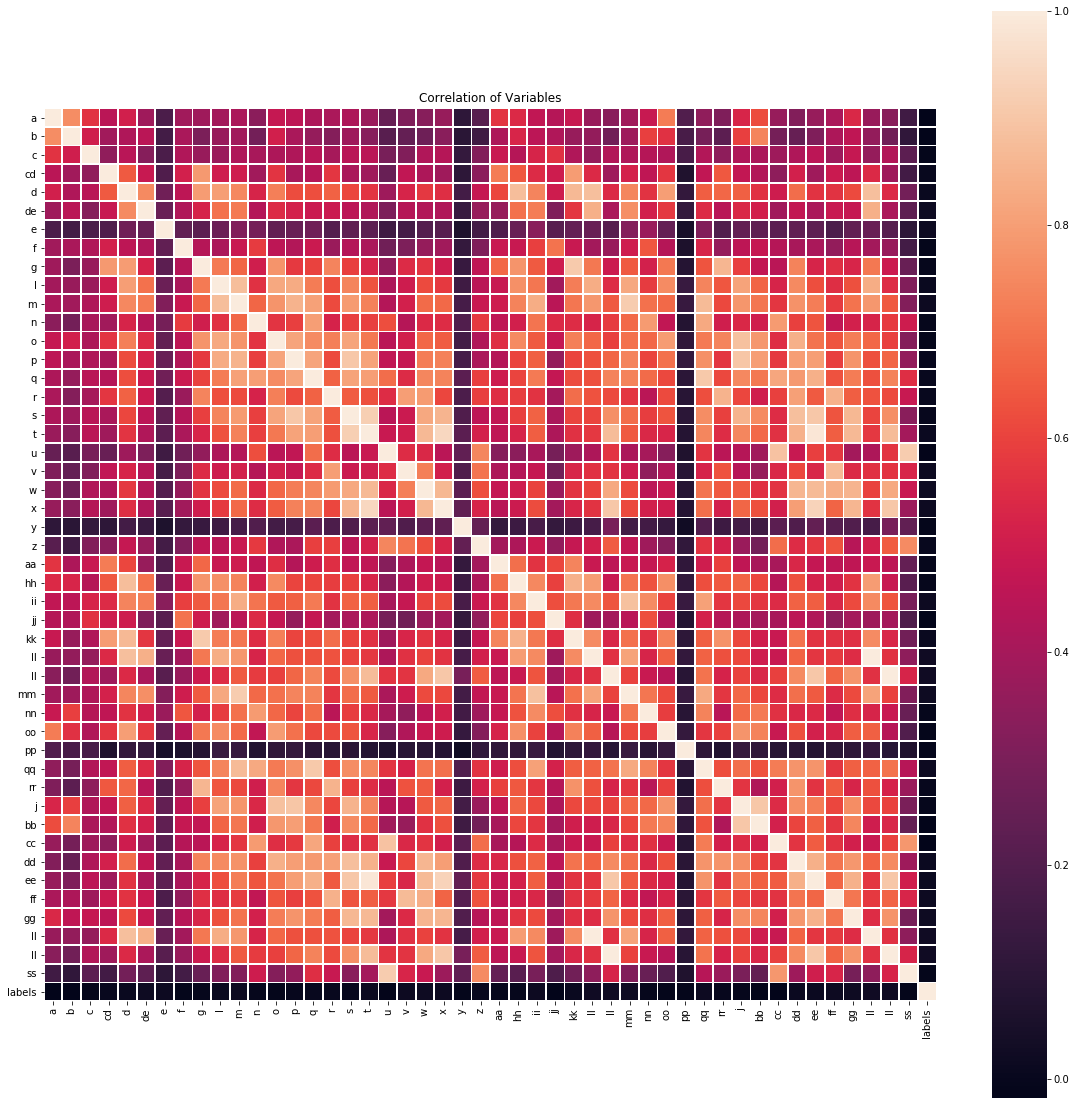

In [8]:
col_list = df.columns
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(df[col_list].corr(),square=True,linewidths=1)
plt.title('Correlation of Variables')

**Normalizing**

In [9]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x =df[df.columns[:46]]
y =df.labels
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =  90)

 **Select numerical columns which needs to be normalized**

In [10]:
train_norm = x_train[x_train.columns[0:20]]
test_norm = x_test[x_test.columns[0:20]]

**Normalize Training Data**

In [11]:
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)

**Converting numpy array to dataframe**

In [12]:
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
x_train.update(training_norm_col)
print (x_train.head())

             a         b         c        cd         d        de         e  \
1585 -0.576753 -0.372682 -0.074834 -0.504292 -0.140518 -0.302438 -0.654885   
992   0.696152  2.045096  0.090483  0.318398  0.028344  1.653377 -0.039127   
8204 -0.115380 -0.401045 -0.208615 -0.170198 -0.281559 -0.031139  0.156204   
4674 -0.438697 -0.391821 -0.080037 -0.654113 -0.335781 -0.531422 -0.586390   
3593 -0.059080 -0.437270 -0.404664  0.732969  0.622826 -0.070637 -0.162896   

             f         g         l         m         n         o         p  \
1585 -0.721665 -0.125282  0.051962  0.021654 -0.612255 -0.045609 -0.220629   
992   1.093952 -0.170117  0.316753  0.018604 -0.317773  0.947197  0.229424   
8204  0.145244 -0.223128  0.140943  0.006892 -0.007252 -0.161003 -0.001202   
4674 -0.534690 -0.569860 -0.515777 -0.532269  0.811251 -0.215648 -0.259049   
3593 -0.548041  0.806137 -0.080424 -0.449904 -0.528932  0.110982 -0.314505   

             q         r         s         t         u        

**Normalize Testing Data by using mean and SD of training set**

In [13]:
x_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns) 
x_test.update(testing_norm_col)
print (x_train.head())

             a         b         c        cd         d        de         e  \
1585 -0.576753 -0.372682 -0.074834 -0.504292 -0.140518 -0.302438 -0.654885   
992   0.696152  2.045096  0.090483  0.318398  0.028344  1.653377 -0.039127   
8204 -0.115380 -0.401045 -0.208615 -0.170198 -0.281559 -0.031139  0.156204   
4674 -0.438697 -0.391821 -0.080037 -0.654113 -0.335781 -0.531422 -0.586390   
3593 -0.059080 -0.437270 -0.404664  0.732969  0.622826 -0.070637 -0.162896   

             f         g         l         m         n         o         p  \
1585 -0.721665 -0.125282  0.051962  0.021654 -0.612255 -0.045609 -0.220629   
992   1.093952 -0.170117  0.316753  0.018604 -0.317773  0.947197  0.229424   
8204  0.145244 -0.223128  0.140943  0.006892 -0.007252 -0.161003 -0.001202   
4674 -0.534690 -0.569860 -0.515777 -0.532269  0.811251 -0.215648 -0.259049   
3593 -0.548041  0.806137 -0.080424 -0.449904 -0.528932  0.110982 -0.314505   

             q         r         s         t         u        

**Support vector machine**

In [14]:
import numpy
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [15]:
def svm_classifier(): 
    
    
    X = data
    y = target
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
   
    	

     # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)    
    X_test = sc.transform(X_test)

    # SVM Classifier
    clf = SVC(kernel = 'rbf', random_state = 50)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    print("Accuracy score : ")
    print(accuracy_score(y_test, y_predict)*100)
    
if __name__ == '__main__':
    svm_classifier()

[[2909   10]
 [2106   10]]
Accuracy score : 
57.974180734856006


In [16]:
pip install --force-reinstall tensorflow

  Using cached https://files.pythonhosted.org/packages/34/d5/ce8c17971067c0184c9045112b755be5461d5ce5253ef65a367e1298d7c5/tensorflow-2.1.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/92/30/1b7ccde09bf0c535d11f18a574ed7d7572c729a8f754fd568b297be08b61/protobuf-3.11.3-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/61/51/046cbc61c7607e5ecead6ff1a9453fba5e7e47a5ea8d608cc7036586a5ef/scipy-1.4.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8c/23/848298cccf8e40f5bbb59009b32848a4c38f4e7f3364297ab3c3e2e2cd14/wheel-0.34.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c3/88/97eef84f48fa04fbd6750e62dcceafba6c63c81b7ac1420856c8dcc0a3f9/astor-0.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhost

tables 3.5.1 requires mock>=2.0, which is not installed.
spyder 3.3.3 requires pyqt5<=5.12; python_version >= "3", which is not installed.
astroid 2.2.5 requires typed-ast>=1.3.0; implementation_name == "cpython", which is not installed.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\bme-4\\anaconda3\\lib\\site-packages\\~0mpy\\.libs\\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



**sequential model**

In [17]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
   



model = Sequential()
model.add(Dense(64, input_dim=48, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=25,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/25


InternalError: 2 root error(s) found.
  (0) Internal: Blas GEMM launch failed : a.shape=(128, 48), b.shape=(48, 64), m=128, n=64, k=48
	 [[{{node dense_1/MatMul}}]]
	 [[metrics/acc/Mean_1/_63]]
  (1) Internal: Blas GEMM launch failed : a.shape=(128, 48), b.shape=(48, 64), m=128, n=64, k=48
	 [[{{node dense_1/MatMul}}]]
0 successful operations.
0 derived errors ignored.

**LSTM MODELLING**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

max_features = 1024

model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=2, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)